I/we certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching, or contributions during the production of this work.

#### **Importing Required Packages**

In [ ]:
!pip install visualkeras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, Activation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")
import visualkeras
from PIL import ImageFont
from scipy.stats import itemfreq

     |████████████████████████████████| 992 kB 5.1 MB/s 


#### **Loading the Dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("Dimensions of X_train: " + str(X_train.shape) + ". Dimensions of X_test: " + str(X_test.shape))
print("Dimensions of y_train: " + str(y_train.shape) + ". Dimensions of y_test: " + str(y_test.shape))

4431872/4422102 [==============================] - 0s 0us/step
Dimensions of X_train: (60000, 28, 28). Dimensions of X_test: (10000, 28, 28)
Dimensions of y_train: (60000,). Dimensions of y_test: (10000,)


In [ ]:
# Labels associated to the respective y_train & y_test values.
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Frequency of Records in Training Set --->
[['Ankle boot' '6000']
 ['Bag' '6000']
 ['Coat' '6000']
 ['Dress' '6000']
 ['Pullover' '6000']
 ['Sandal' '6000']
 ['Shirt' '6000']
 ['Sneaker' '6000']
 ['T-shirt/top' '6000']
 ['Trouser' '6000']] 



Text(0.5, 1.0, 'Frequency of Records in Training Set')

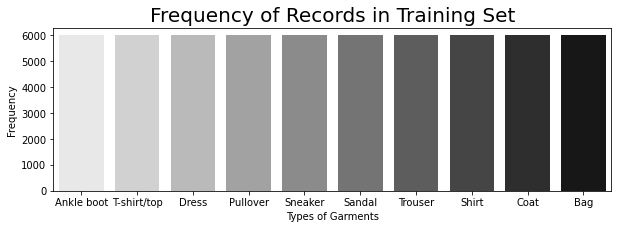

In [ ]:
train_np = [labels[v] for i,v in enumerate(y_train)]
print('Frequency of Records in Training Set --->')
print(itemfreq(train_np), '\n')


plt.figure(figsize=(10,3))
sns.countplot(train_np, palette = 'gray_r')
plt.xlabel("Types of Garments")
plt.ylabel("Frequency")
plt.title("Frequency of Records in Training Set", fontsize = 20)

The Training Set has 6000 records of every single type of garment

Frequency of Records in Test Set --->
[['Ankle boot' '1000']
 ['Bag' '1000']
 ['Coat' '1000']
 ['Dress' '1000']
 ['Pullover' '1000']
 ['Sandal' '1000']
 ['Shirt' '1000']
 ['Sneaker' '1000']
 ['T-shirt/top' '1000']
 ['Trouser' '1000']] 



Text(0.5, 1.0, 'Frequency of Records in Test Set')

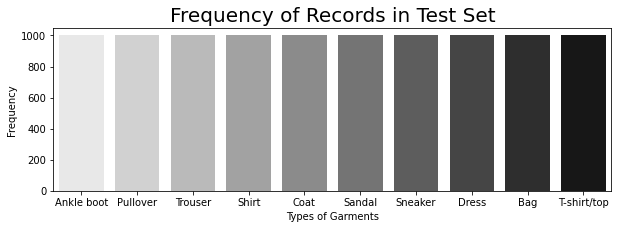

In [ ]:
test_np = [labels[v] for i,v in enumerate(y_test)]
print('Frequency of Records in Test Set --->')
print(itemfreq(test_np), '\n')


plt.figure(figsize=(10,3))
sns.countplot(test_np, palette = 'gray_r')
plt.xlabel("Types of Garments")
plt.ylabel("Frequency")
plt.title("Frequency of Records in Test Set", fontsize = 20)

The Training Set has 6000 records of every single type of garment.

In [ ]:
test_np = np.array(y_test)
for i,v in enumerate(itemfreq(test_np)):
  print([labels[i], v[1]])

['T-shirt/top', 1000]
['Trouser', 1000]
['Pullover', 1000]
['Dress', 1000]
['Coat', 1000]
['Sandal', 1000]
['Shirt', 1000]
['Sneaker', 1000]
['Bag', 1000]
['Ankle boot', 1000]


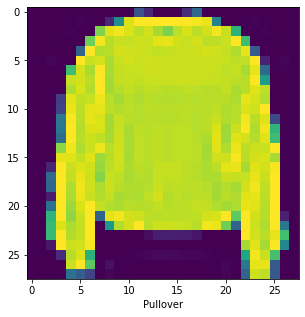

In [ ]:
# Ref: GitHub Repo of the Fashion MNIST

plt.figure(figsize=(5,5))
plt.imshow(X_train[7])
plt.xlabel(labels[y_train[7]])
plt.show()

With X_train[7],  y_train[7], we can print a pull out a single image from the dataset.

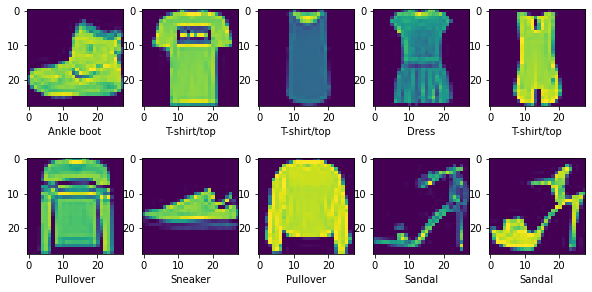

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.xlabel(labels[y_train[i]])
plt.show()

Displays each class available in the dataset.

#### **Normalizing X_train & X_test**
* Since the given data is an image, the pixels have values between 0 to 255.
* We are manually rescaling them to a value between 0 and 1 by dividing it by 255.
* This reduces the differences caused by the effect of illumination.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

#### **Reshaping X_train & X_test**

* The images are represented in grayscale and as 28 X 28 pixels.
* By reshaping the data, it would now have a single colour channel.
* Since the images in our dataset are in grayscale, keras would need this extra channel. 

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
print("After Reshaping --->")
print("Dimensions of X_train: " + str(X_train.shape) + ". Dimensions of X_test: " + str(X_test.shape))

After Reshaping --->
Dimensions of X_train: (60000, 28, 28, 1). Dimensions of X_test: (10000, 28, 28, 1)


#### **Performing LabelEncoding**
* The label encoding converts the labels to one hot vectors which we can compute easily.
* For ex. a value of 2 would be encoded to a vector of [0,1,0,0,0,0,0,0,0,0] and 9 to [0,0,0,0,0,0,0,0,1,0]

In [ ]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)
print("Example of the encoding: " + str(y_train[0]))


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Example of the encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


#### **Defining the CNN Model**

**Input Layers:**
* We've defined 2 hidden layers that have 128 filters each defined using `Conv2D` as 2D Convolutional layers.
* The kernel size is 3 or `(3,3)` and the input shape is `(28,28,1)`.
* To keep the output size equal to the input size we've `used padding = 'same'` and `strides = (1,1)`.
* `MaxPool2D` has been used in the second and third layers to downscale the data by a factor of `(2,2)` on each direction.
* Every input layer has a Dropout layer of **0.25** added to it.

**Output Layers:**
* A final Dense fully connected layer has been added with a **output space dimensionality of 256**.
* We have **10 classes** in total so the output layer has a size of 10.
* Since this is a multi-class classification problem, the activation function of choice is `softmax`.

**Comments:**
* `adam` is the optimizer of choice.
* Since the inputs have been one-hot encoded, we've used `categorical_crossentropy`.

In [ ]:
def cnn_model(dropout, activ_func_input, activ_func_output, kernel_init, kernelsize, padding, batch_norm = False):

  model = Sequential()

  # First Hidden Layer
  model.add(Conv2D(128, kernel_size = kernelsize, kernel_initializer=kernel_init, strides = (1,1), padding = padding, input_shape=(28, 28, 1)))
  if batch_norm == True:
    model.add(BatchNormalization())
  model.add(Activation(activ_func_input))
  model.add(Dropout(dropout))
  model.add(MaxPool2D(pool_size=(2, 2)))

  # Second Hidden Layer
  model.add(Conv2D(128, kernel_size = kernelsize, kernel_initializer=kernel_init, strides = (1,1), padding = padding))
  if batch_norm == True:
    model.add(BatchNormalization())
  model.add(Activation(activ_func_input))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))

  # Fully Connected Layer
  model.add(Flatten())
  model.add(Dense(256))
  if batch_norm == True:
    model.add(BatchNormalization())
  model.add(Activation(activ_func_input))

  # Output Layer
  model.add(Dense(10, activation=activ_func_output))

  return model

In [ ]:
model = cnn_model(dropout = 0.25, 
                  activ_func_input = "relu", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (3,3), 
                  padding = "same")

# Compiling The Model
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

# Fitting The Model (10 Epochs)
model_history = model.fit(X_train, y_train, 
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose = 0)

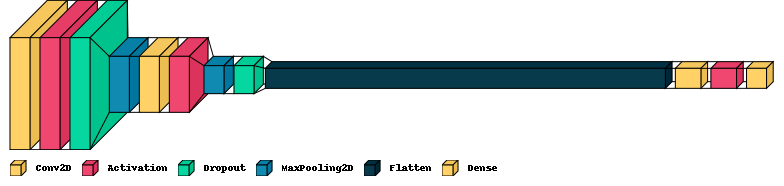

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
# Evaluating the model to know the Training Accuracy

model_train_accuracy = model.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_train_accuracy*100), "%\n")

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0279 - accuracy: 0.9922
The Training accuracy is: 99.22 %



In [ ]:
model_test = model.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[1]

print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 31.41 %
Test accuracy: 92.09 %


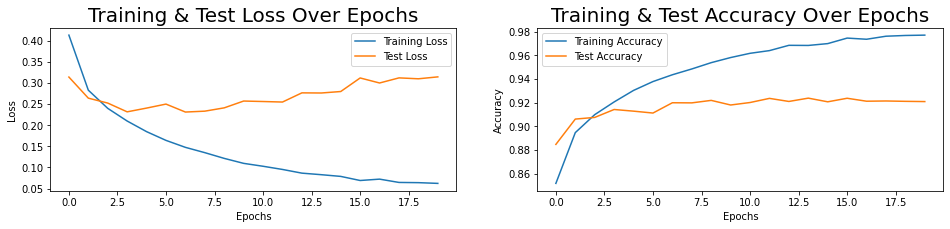

In [ ]:
plt.figure(figsize=(16, 3))

train_loss = model_history.history['loss']
test_loss = model_history.history['val_loss']

plt.subplot(1,2,1)
sns.lineplot(range(len(train_loss)), train_loss, label="Training Loss")
sns.lineplot(range(len(test_loss)), test_loss, label="Test Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Test Loss Over Epochs", fontsize = 20)
plt.legend()

train_accuracy = model_history.history['accuracy']
test_accuracy = model_history.history['val_accuracy']

plt.subplot(1,2,2)
sns.lineplot(range(len(train_accuracy)), train_accuracy, label="Training Accuracy")
sns.lineplot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Test Accuracy Over Epochs", fontsize = 20)
plt.legend()


#### **Observations From The Graphs**

In [ ]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + " Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")

Most minimal Training Loss was observed at the 19 Epoch.
The maximum Test Accuracy was observed at the 13 Epoch.


## **Methods to Improve Model**

1. Early Stopping.
2. Model Check Point.

#### **1. Early Stopping**

In [ ]:
early_stopping = EarlyStopping(monitor ='val_loss', min_delta=1e-04, mode = "min", patience = 5, verbose = 0)
model_es = cnn_model(dropout = 0.25, 
                  activ_func_input = "relu", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (3,3), 
                  padding = "same")

# Compiling The Model
model_es.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

model_fit_es = model_es.fit(X_train, y_train, 
                           epochs = 20,  
                           validation_data=(X_test, y_test),
                           callbacks = [early_stopping],
                            verbose = 1)

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4059 - accuracy: 0.8520 - val_loss: 0.3258 - val_accuracy: 0.8778
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2806 - accuracy: 0.8958 - val_loss: 0.2769 - val_accuracy: 0.8999
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2383 - accuracy: 0.9102 - val_loss: 0.2611 - val_accuracy: 0.9040
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2104 - accuracy: 0.9211 - val_loss: 0.2385 - val_accuracy: 0.9147
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1829 - accuracy: 0.9303 - val_loss: 0.2304 - val_accuracy: 0.9160
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1655 - accuracy: 0.9368 - val_loss: 0.2285 - val_accuracy: 0.9162
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1452 - accuracy: 0.9450 - val_loss: 0.2396 - val_ac

In [ ]:
# Evaluating the model to know the Training Accuracy
model_es_accuracy = model_es.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_es_accuracy*100), "%\n")

1875/1875 [==============================] - 7s 3ms/step - loss: 0.0575 - accuracy: 0.9797
The Training accuracy is: 97.97 %



In [ ]:
model_test = model_es.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[1]

print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 28.99 %
Test accuracy: 92.04 %


#### **Defining a function to reduce obsolete code and to plot accuracy & losses**

In [ ]:
def plot_accuracy_loss(improv_model, base_model):
  plt.figure(figsize=(16, 3))

  test_accuracy_es = improv_model.history['val_accuracy']
  test_accuracy = base_model.history['val_accuracy']


  plt.subplot(1,2,1)
  sns.lineplot(range(len(test_accuracy_es)), test_accuracy_es, label="Test Accuracy of the improved model")
  sns.lineplot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy of the base model")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.title("Test Accuracy Over Epochs", fontsize = 20)
  plt.legend()


  test_loss_es = improv_model.history['val_loss']
  test_loss = base_model.history['val_loss']

  plt.subplot(1,2,2)
  sns.lineplot(range(len(test_loss_es)), test_loss_es, label="Test Loss of the improved model")
  sns.lineplot(range(len(test_loss)), test_loss, label="Test Loss of the base model")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Test Loss Over Epochs", fontsize = 20)
  plt.legend()

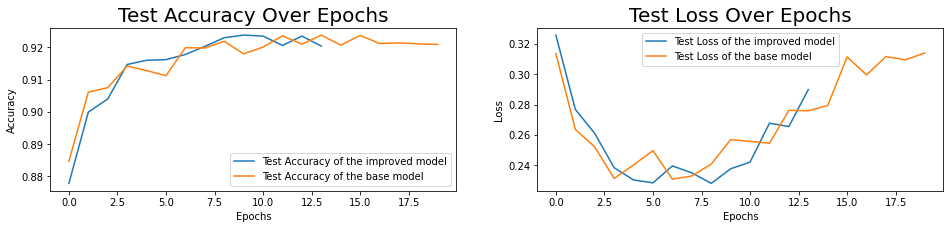

In [ ]:
# Plotting (Testing & Training Accuracy) and (Test & Train Loss)
plot_accuracy_loss(model_fit_es, model_history)

#### **Model Check Point**

In [ ]:
model_check_point = ModelCheckpoint("model.h5", monitor = "val_accuracy", save_best_only = True, mode='max', patience = 1, verbose = 1)
model_mcp = cnn_model(dropout = 0.25, 
                  activ_func_input = "relu", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (3,3), 
                  padding = "same")

# Compiling The Model
model_mcp.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

model_fit_mcp = model_mcp.fit(X_train, y_train, 
                           epochs = 20,  
                           validation_data=(X_test, y_test),
                           callbacks = [model_check_point],
                           verbose = 0)


Epoch 1: val_accuracy improved from -inf to 0.87460, saving model to model.h5

Epoch 2: val_accuracy improved from 0.87460 to 0.89710, saving model to model.h5

Epoch 3: val_accuracy improved from 0.89710 to 0.90830, saving model to model.h5

Epoch 4: val_accuracy did not improve from 0.90830

Epoch 5: val_accuracy improved from 0.90830 to 0.91380, saving model to model.h5

Epoch 6: val_accuracy improved from 0.91380 to 0.91800, saving model to model.h5

Epoch 7: val_accuracy improved from 0.91800 to 0.92190, saving model to model.h5

Epoch 8: val_accuracy improved from 0.92190 to 0.92240, saving model to model.h5

Epoch 9: val_accuracy did not improve from 0.92240

Epoch 10: val_accuracy did not improve from 0.92240

Epoch 11: val_accuracy did not improve from 0.92240

Epoch 12: val_accuracy improved from 0.92240 to 0.92450, saving model to model.h5

Epoch 13: val_accuracy did not improve from 0.92450

Epoch 14: val_accuracy did not improve from 0.92450

Epoch 15: val_accuracy did no

In [ ]:
# Evaluating the model to know the Training Accuracy
model_mcp_accuracy = model_mcp.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_mcp_accuracy*100), "%\n")

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0316 - accuracy: 0.9912
The Training accuracy is: 99.12 %



In [ ]:
model_test = model_mcp.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[1]

print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 33.44 %
Test accuracy: 92.14 %


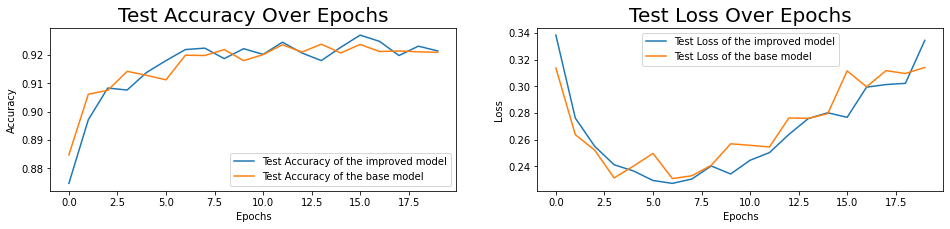

In [ ]:
# Plotting (Testing & Training Accuracy) and (Test & Train Loss)
plot_accuracy_loss(model_fit_mcp, model_history)

#### **K Fold Cross Validation (K = 5)**

In [ ]:
from sklearn.model_selection import KFold

# Defining KFold
folds = 5
kfold = KFold(n_splits= folds)

# Concatenating (X_train, X_test) & (Y_train, y_test)
X_values = np.concatenate((X_train, X_test))
y_values = np.concatenate((y_train, y_test))

# Performing K Fold Validation
fold = 1
k_loss, k_accuracy = [], []

for train, test in kfold.split(X_values, y_values):
  model_k = cnn_model(dropout = 0.25, 
                  activ_func_input = "relu", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (3,3), 
                  padding = "same")
  
  model_k.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])
  
  print('Currently running ---> ' + "Fold " + str(fold))
  model_fit_k = model_k.fit(X_values[train], y_values[train], 
                           epochs = 20, 
                           batch_size = 20, 
                           validation_data = (X_test, y_test), 
                           shuffle=True,
                           verbose = 0)

  scores = model_k.evaluate(X_values[test], y_values[test], verbose=0)
  print('Model Loss: ' + str(scores[0]) + '; Model Accuracy: ' + str(round(scores[1]*100,2)) + '%' + '\n')
  k_loss.append(scores[0])
  k_accuracy.append(scores[1])


  # Increasing the number of folds
  fold = fold + 1

Currently running ---> Fold 1
Model Loss: 0.2904818058013916; Model Accuracy: 92.44%

Currently running ---> Fold 2
Model Loss: 0.3013153374195099; Model Accuracy: 92.22%

Currently running ---> Fold 3
Model Loss: 0.33320143818855286; Model Accuracy: 92.56%

Currently running ---> Fold 4
Model Loss: 0.34148725867271423; Model Accuracy: 91.98%

Currently running ---> Fold 5
Model Loss: 0.33391326665878296; Model Accuracy: 92.29%



In [ ]:
# Evaluating the model to know the Training Accuracy
model_k_accuracy = model_k.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_mcp_accuracy*100), "%\n")

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0492 - accuracy: 0.9863
The Training accuracy is: 99.12 %



In [ ]:
model_test = model_k.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[1]

print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 34.6 %
Test accuracy: 92.17 %


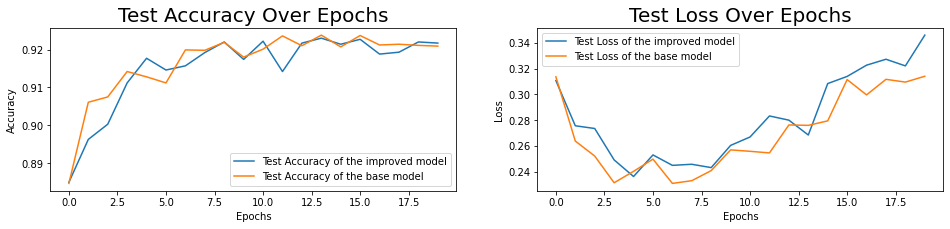

In [ ]:
# Plotting (Testing & Training Accuracy) and (Test & Train Loss)
plot_accuracy_loss(model_fit_k, model_history)

#### **Batch Normalization**

In [ ]:
# Using the Pre-defined function (but, declaring batch_norm = True)
model_bn = cnn_model(dropout = 0.25, 
                  activ_func_input = "relu", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (3,3), 
                  padding = "same",
                  batch_norm = True)

# Compiling The Model
model_bn.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

model_fit_bn = model_bn.fit(X_train, y_train, 
                           epochs = 20,  
                           validation_data=(X_test, y_test),
                           verbose = 1)

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3657 - accuracy: 0.8680 - val_loss: 0.2929 - val_accuracy: 0.8927
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2593 - accuracy: 0.9041 - val_loss: 0.2639 - val_accuracy: 0.9013
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2203 - accuracy: 0.9178 - val_loss: 0.2351 - val_accuracy: 0.9167
Epoch 4/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1926 - accuracy: 0.9281 - val_loss: 0.2612 - val_accuracy: 0.9053
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1676 - accuracy: 0.9375 - val_loss: 0.2109 - val_accuracy: 0.9226
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1489 - accuracy: 0.9439 - val_loss: 0.2094 - val_accuracy: 0.9265
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1318 - accuracy: 0.9503 - val_loss: 0.2263 - val_ac

In [ ]:
# Evaluating the model to know the Training Accuracy
model_bn_accuracy = model_bn.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_bn_accuracy*100), "%\n")

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0164 - accuracy: 0.9974
The Training accuracy is: 99.74 %



In [ ]:
model_test = model_bn.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[-1]

print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 24.24 %
Test accuracy: 93.09 %


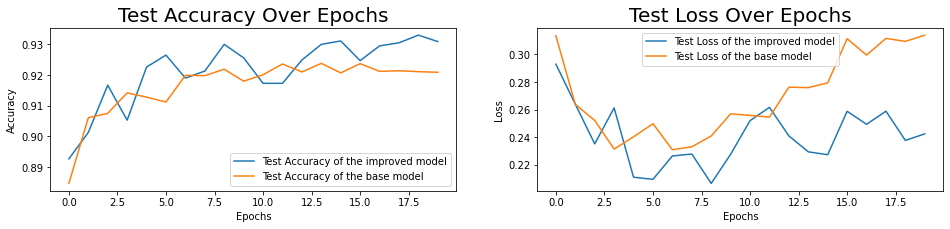

In [ ]:
# Plotting (Testing & Training Accuracy) and (Test & Train Loss)
plot_accuracy_loss(model_fit_bn, model_history)

## **Part IV: Optimizing CNN + Data Argumentation [30 points]**

## **Chosen Hyperparameter - Dropout**

**Changing the Dropout value to 0 in Setup 1**

**Setup 1 Hyperparameters**                                                                  
Dropout : 0                                                                    
Optimizer : Adam                                                                 
Activation Function: RELU, Softmax                                                
Initializer: He Normal                                                      
Kernel size: (3,3)                                                               
Padding: same

In [ ]:
model_1 = cnn_model(dropout = 0, 
                  activ_func_input = "relu", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (3,3), 
                  padding = "same")

# Compiling The Model
model_1.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

# Fitting The Model (5 Epochs)
model_history = model_1.fit(X_train, y_train, 
                    epochs= 20,
                    validation_data=(X_test, y_test),
                    verbose = 0)

In [ ]:
# Evaluating the model to know the Training Accuracy

model_train_accuracy = model_1.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_train_accuracy*100), "%\n")

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0089 - accuracy: 0.9970
The Training accuracy is: 99.70 %



In [ ]:
model_test = model_1.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[1]
print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 63.18 %
Test accuracy: 92.21 %


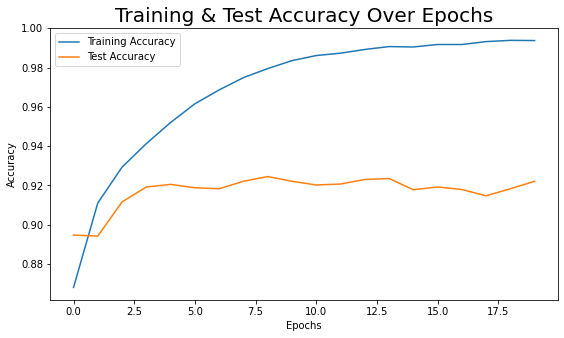

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,2)
train_accuracy = model_history.history['accuracy']; test_accuracy = model_history.history['val_accuracy']
sns.lineplot(range(len(train_accuracy)), train_accuracy, label="Training Accuracy")
sns.lineplot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.title("Training & Test Accuracy Over Epochs", fontsize = 20)
plt.legend()


In [ ]:
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")
print("The maximum Training Accuracy was observed at the " + str(np.argmax(train_accuracy)) + " Epoch.")

The maximum Test Accuracy was observed at the 8 Epoch.
The maximum Training Accuracy was observed at the 18 Epoch.


**Changing the Dropout value to 0.5 in Setup 2**

**Setup 2 Hyperparameters**                                                                  
Dropout : 0.5                                                                    
Optimizer : Adam                                                                 
Activation Function: RELU, Softmax                                                
Initializer: He Normal                                                      
Kernel size: (3,3)                                                               
Padding: same

In [ ]:
model_2 = cnn_model(dropout = 0.5, 
                  activ_func_input = "relu", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (3,3), 
                  padding = "same")

# Compiling The Model
model_2.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

# Fitting The Model (5 Epochs)
model_history = model_2.fit(X_train, y_train, 
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose = 0)

In [ ]:
# Evaluating the model to know the Training Accuracy

model_train_accuracy = model_2.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_train_accuracy*100), "%\n")

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1105 - accuracy: 0.9640
The Training accuracy is: 96.40 %



In [ ]:
model_test = model_2.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[1]
print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 24.5 %
Test accuracy: 91.39 %


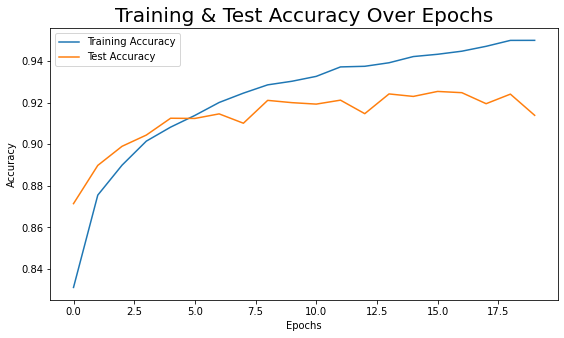

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,2)
train_accuracy = model_history.history['accuracy']; test_accuracy = model_history.history['val_accuracy']
sns.lineplot(range(len(train_accuracy)), train_accuracy, label="Training Accuracy")
sns.lineplot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.title("Training & Test Accuracy Over Epochs", fontsize = 20)
plt.legend()

In [ ]:
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")
print("The maximum Training Accuracy was observed at the " + str(np.argmax(train_accuracy)) + " Epoch.")

The maximum Test Accuracy was observed at the 15 Epoch.
The maximum Training Accuracy was observed at the 19 Epoch.


**Changing the Dropout value to 0.8 in Setup 3**

**Setup 3 Hyperparameters**                                                                  
Dropout : 0.8                                                                    
Optimizer : Adam                                                                 
Activation Function: RELU, Softmax                                                
Initializer: He Normal                                                      
Kernel size: (3,3)                                                               
Padding: same

In [ ]:
model_3 = cnn_model(dropout = 0.8, 
                  activ_func_input = "relu", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (3,3), 
                  padding = "same")

# Compiling The Model
model_3.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

# Fitting The Model (10 Epochs)
model_history = model_3.fit(X_train, y_train, 
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose = 0)

In [ ]:
# Evaluating the model to know the Training Accuracy

model_train_accuracy = model_3.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_train_accuracy*100), "%\n")

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2815 - accuracy: 0.9134
The Training accuracy is: 91.34 %



In [ ]:
model_test = model_3.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[1]
print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 31.3 %
Test accuracy: 89.68 %


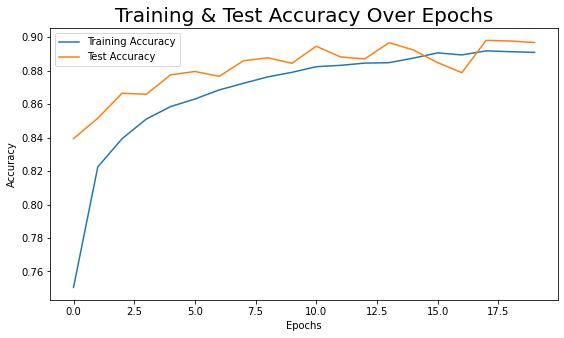

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,2)
train_accuracy = model_history.history['accuracy']
test_accuracy = model_history.history['val_accuracy']

sns.lineplot(range(len(train_accuracy)), train_accuracy, label="Training Accuracy")
sns.lineplot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Test Accuracy Over Epochs", fontsize = 20)
plt.legend()

In [ ]:
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")
print("The maximum Training Accuracy was observed at the " + str(np.argmax(train_accuracy)) + " Epoch.")

The maximum Test Accuracy was observed at the 17 Epoch.
The maximum Training Accuracy was observed at the 17 Epoch.


## **Chosen Hyperparameter - Kernel Size**

**Changing the Kernel Size to (1,1) in Setup 4**

**Setup 4 Hyperparameters**                                                                  
Dropout : 0.25                                                                    
Optimizer : Adam                                                                 
Activation Function: RELU, Softmax                                                
Initializer: He Normal                                                      
Kernel size: (1,1)                                                               
Padding: same

In [ ]:
model_4 = cnn_model(dropout = 0.25, 
                  activ_func_input = "relu", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (1,1), 
                  padding = "same")

# Compiling The Model
model_4.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

# Fitting The Model (5 Epochs)
model_history = model_4.fit(X_train, y_train, 
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose = 0)

In [ ]:
# Evaluating the model to know the Training Accuracy

model_train_accuracy = model_4.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_train_accuracy*100), "%\n")

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2626 - accuracy: 0.9044
The Training accuracy is: 90.44 %



In [ ]:
model_test = model_4.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[1]
print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 35.95 %
Test accuracy: 87.01 %


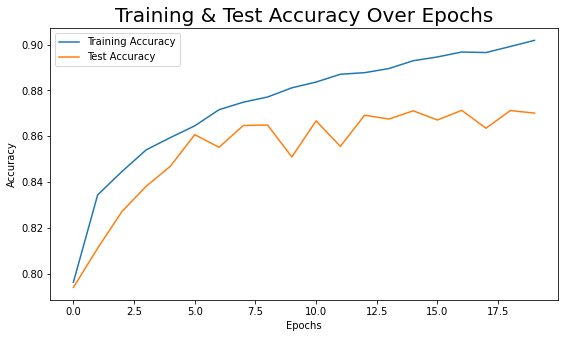

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,2)
train_accuracy = model_history.history['accuracy']
test_accuracy = model_history.history['val_accuracy']

sns.lineplot(range(len(train_accuracy)), train_accuracy, label="Training Accuracy")
sns.lineplot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Test Accuracy Over Epochs", fontsize = 20)
plt.legend()

In [ ]:
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")
print("The maximum Training Accuracy was observed at the " + str(np.argmax(train_accuracy)) + " Epoch.")

The maximum Test Accuracy was observed at the 16 Epoch.
The maximum Training Accuracy was observed at the 19 Epoch.


**Changing the Kernel Size to (5,5) in Setup 5**

**Setup 5 Hyperparameters**                                                                  
Dropout : 0.25                                                                    
Optimizer : Adam                                                                 
Activation Function: RELU, Softmax                                                
Initializer: He Normal                                                      
Kernel size: (5,5)                                                               
Padding: same

In [ ]:
model_5 = cnn_model(dropout = 0.25, 
                  activ_func_input = "relu", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (5,5), 
                  padding = "same")

# Compiling The Model
model_5.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

# Fitting The Model (5 Epochs)
model_history = model_5.fit(X_train, y_train, 
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose = 0)

In [ ]:
# Evaluating the model to know the Training Accuracy

model_train_accuracy = model_5.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_train_accuracy*100), "%\n")

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0358 - accuracy: 0.9885
The Training accuracy is: 98.85 %



In [ ]:
model_test = model_5.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[1]
print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 31.71 %
Test accuracy: 92.32 %


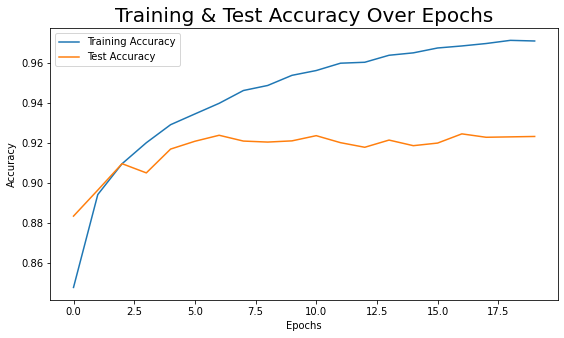

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,2)
train_accuracy = model_history.history['accuracy']
test_accuracy = model_history.history['val_accuracy']

sns.lineplot(range(len(train_accuracy)), train_accuracy, label="Training Accuracy")
sns.lineplot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Test Accuracy Over Epochs", fontsize = 20)
plt.legend()

In [ ]:
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")
print("The maximum Training Accuracy was observed at the " + str(np.argmax(train_accuracy)) + " Epoch.")

The maximum Test Accuracy was observed at the 16 Epoch.
The maximum Training Accuracy was observed at the 18 Epoch.


**Changing the Kernel Size to (7,7) in Setup 6**

**Setup 6 Hyperparameters**                                                                  
Dropout : 0.25                                                                    
Optimizer : Adam                                                                 
Activation Function: RELU, Softmax                                                
Initializer: He Normal                                                      
Kernel size: (7,7)                                                               
Padding: same

In [ ]:
model_6 = cnn_model(dropout = 0.25, 
                  activ_func_input = "relu", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (5,5), 
                  padding = "same")

# Compiling The Model
model_6.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

# Fitting The Model (5 Epochs)
model_history = model_6.fit(X_train, y_train, 
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose = 0)

In [ ]:
# Evaluating the model to know the Training Accuracy

model_train_accuracy = model_6.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_train_accuracy*100), "%\n")

1875/1875 [==============================] - 7s 3ms/step - loss: 0.0404 - accuracy: 0.9866
The Training accuracy is: 98.66 %



In [ ]:
model_test = model_6.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[1]
print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 31.82 %
Test accuracy: 91.87 %


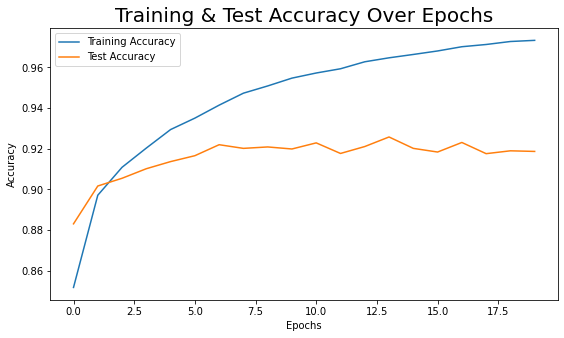

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,2)
train_accuracy = model_history.history['accuracy']
test_accuracy = model_history.history['val_accuracy']

sns.lineplot(range(len(train_accuracy)), train_accuracy, label="Training Accuracy")
sns.lineplot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Test Accuracy Over Epochs", fontsize = 20)
plt.legend()

In [ ]:
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")
print("The maximum Training Accuracy was observed at the " + str(np.argmax(train_accuracy)) + " Epoch.")

The maximum Test Accuracy was observed at the 13 Epoch.
The maximum Training Accuracy was observed at the 19 Epoch.


## **Chosen Hyperparameter - Activation function**

**Changing the Activation function to SELU in Setup 7**

**Setup 7 Hyperparameters**                                                                  
Dropout : 0.25                                                                    
Optimizer : Adam                                                                 
Activation Function: SELU, Softmax                                                
Initializer: He Normal                                                      
Kernel size: (3,3)                                                               
Padding: same

In [ ]:
model_7 = cnn_model(dropout = 0.25, 
                  activ_func_input = "selu", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (3,3), 
                  padding = "same")

# Compiling The Model
model_7.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

# Fitting The Model (5 Epochs)
model_history = model_7.fit(X_train, y_train, 
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose = 0)

In [ ]:
# Evaluating the model to know the Training Accuracy

model_train_accuracy = model_7.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_train_accuracy*100), "%\n")

1875/1875 [==============================] - 7s 3ms/step - loss: 0.1167 - accuracy: 0.9601
The Training accuracy is: 96.01 %



In [ ]:
model_test = model_7.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[1]
print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 56.77 %
Test accuracy: 90.31 %


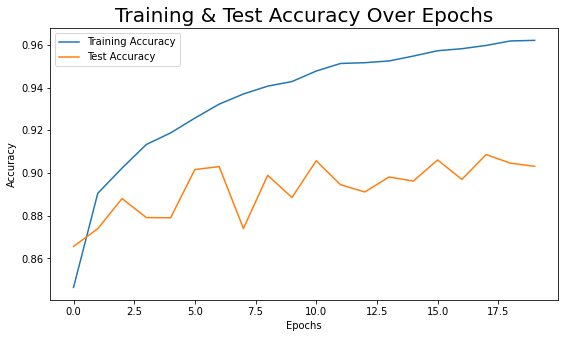

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,2)
train_accuracy = model_history.history['accuracy']
test_accuracy = model_history.history['val_accuracy']

sns.lineplot(range(len(train_accuracy)), train_accuracy, label="Training Accuracy")
sns.lineplot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Test Accuracy Over Epochs", fontsize = 20)
plt.legend()

In [ ]:
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")
print("The maximum Training Accuracy was observed at the " + str(np.argmax(train_accuracy)) + " Epoch.")

The maximum Test Accuracy was observed at the 17 Epoch.
The maximum Training Accuracy was observed at the 19 Epoch.


**Changing the Activation function to ELU in Setup 8**

**Setup 8 Hyperparameters**                                                                  
Dropout : 0.25                                                                    
Optimizer : Adam                                                                 
Activation Function: ELU, Softmax                                                
Initializer: He Uniform                                                      
Kernel size: (3,3)                                                               
Padding: same

In [ ]:
model_8 = cnn_model(dropout = 0.25, 
                  activ_func_input = "elu", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (3,3), 
                  padding = "same")

# Compiling The Model
model_8.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

# Fitting The Model (5 Epochs)
model_history = model_8.fit(X_train, y_train, 
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose = 0)

In [ ]:
# Evaluating the model to know the Training Accuracy

model_train_accuracy = model_8.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_train_accuracy*100), "%\n")

1875/1875 [==============================] - 7s 3ms/step - loss: 0.1912 - accuracy: 0.9545
The Training accuracy is: 95.45 %



In [ ]:
model_test = model_8.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[1]
print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 69.64 %
Test accuracy: 89.95 %


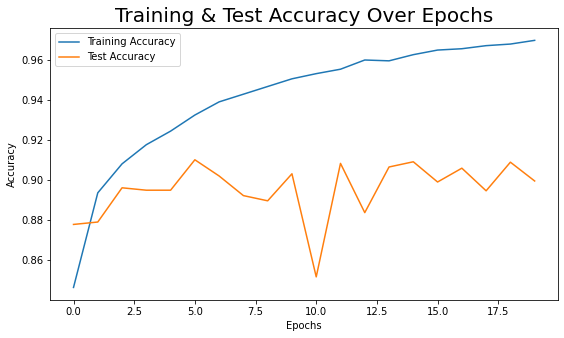

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,2)
train_accuracy = model_history.history['accuracy']
test_accuracy = model_history.history['val_accuracy']

sns.lineplot(range(len(train_accuracy)), train_accuracy, label="Training Accuracy")
sns.lineplot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Test Accuracy Over Epochs", fontsize = 20)
plt.legend()

In [ ]:
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")
print("The maximum Training Accuracy was observed at the " + str(np.argmax(train_accuracy)) + " Epoch.")

The maximum Test Accuracy was observed at the 5 Epoch.
The maximum Training Accuracy was observed at the 19 Epoch.


**Changing the Activation function to tanh in Setup 9**

**Setup 9 Hyperparameters**                                                                  
Dropout : 0.25                                                                    
Optimizer : Adam                                                                 
Activation Function: tanh, Softmax                                                
Initializer: He Normal                                                      
Kernel size: (3,3)                                                               
Padding: same

In [ ]:
model_9 = cnn_model(dropout = 0.25, 
                  activ_func_input = "tanh", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (3,3), 
                  padding = "same")

# Compiling The Model
model_9.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

# Fitting The Model (20 Epochs)
model_history = model_9.fit(X_train, y_train, 
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose = 0)

In [ ]:
# Evaluating the model to know the Training Accuracy

model_train_accuracy = model_9.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_train_accuracy*100), "%\n")

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3052 - accuracy: 0.8862
The Training accuracy is: 88.62 %



In [ ]:
model_test = model_9.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[1]
print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 34.97 %
Test accuracy: 87.43 %


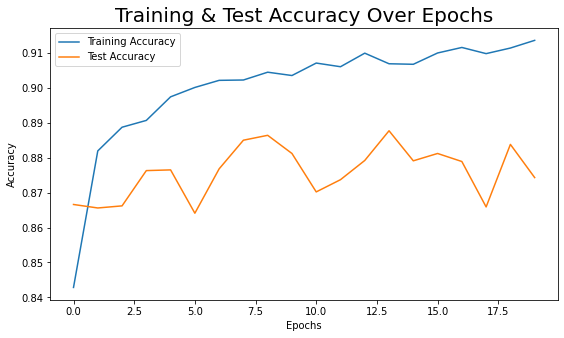

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,2)
train_accuracy = model_history.history['accuracy']; test_accuracy = model_history.history['val_accuracy']

sns.lineplot(range(len(train_accuracy)), train_accuracy, label="Training Accuracy")
sns.lineplot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Test Accuracy Over Epochs", fontsize = 20)
plt.legend()

In [ ]:
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")
print("The maximum Training Accuracy was observed at the " + str(np.argmax(train_accuracy)) + " Epoch.")

The maximum Test Accuracy was observed at the 13 Epoch.
The maximum Training Accuracy was observed at the 19 Epoch.


#### **DATA AUGMENTATION**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(rotation_range=50, 
                                    width_shift_range=0.01, 
                                    height_shift_range=0.01,
                              horizontal_flip = True)

augment = data_gen.fit(X_train)

model = cnn_model(dropout = 0.25, 
                  activ_func_input = "relu", 
                  activ_func_output = "softmax", 
                  kernel_init = "he_normal", 
                  kernelsize = (3,3), 
                  padding = "same")

# Compiling The Model
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])


# Fitting The Model (5 Epochs)
model_history = model.fit(data_gen.flow(X_train, y_train), shuffle = True,
                          validation_data=data_gen.flow(X_test, y_test,), 
                          epochs=20)

Epoch 1/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.6439 - accuracy: 0.7645 - val_loss: 0.4963 - val_accuracy: 0.8240
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4572 - accuracy: 0.8284 - val_loss: 0.4686 - val_accuracy: 0.8216
Epoch 3/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.4043 - accuracy: 0.8504 - val_loss: 0.3850 - val_accuracy: 0.8582
Epoch 4/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3745 - accuracy: 0.8591 - val_loss: 0.3925 - val_accuracy: 0.8612
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3542 - accuracy: 0.8687 - val_loss: 0.3491 - val_accuracy: 0.8733
Epoch 6/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3391 - accuracy: 0.8749 - val_loss: 0.3374 - val_accuracy: 0.8757
Epoch 7/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3268 - accuracy: 0.8794 - val_loss: 0.3354 -

In [ ]:
# Evaluating the model to know the Training Accuracy

model_train_accuracy = model.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (model_train_accuracy*100), "%\n")

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2295 - accuracy: 0.9163
The Training accuracy is: 91.63 %



In [ ]:
model_test = model.evaluate(X_test, y_test, verbose=0)
loss = model_test[0]
accuracy = model_test[1]
print('Test loss:', round(loss*100, 2), "%")
print('Test accuracy:', round(accuracy*100, 2), "%")

Test loss: 27.29 %
Test accuracy: 90.29 %
